In [1]:
import os
# Change to your projecgit reflog
os.chdir(r'C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis')

In [2]:
# Import the load_data function from the utils file
from utils.processed_data import load_data  


# Load the data
processed_xdr_data = load_data()

# Display the DataFrame
print(processed_xdr_data.head())  # Display the first 5 rows of the DataFram

C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis\utils\processed_data.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  processed_xdr_data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

C:\Users\sumey\Desktop\visual_projects\telecom_company_analysis\utils\processed_data.py:26: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  processed_xdr_data = pd.read_sql_query(query, connection)


      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube UL (Bytes)  Netflix DL (Bytes)  \
0  9.16456699548519E+015  ...           2501332.0           8198936.0   
1                L77566A  ...          19111729.0          18338413.0   

#### we aggregates the total download (DL) and upload (UL) data for various applications (such as Social Media, Netflix, Google, Email, Gaming, and YouTube) per customer identified by their MSISDN/Number then, identifies and displays the top 10 customers for each application based on their aggregated data usage, providing insights into which customers engage the most with each service.

In [3]:
import pandas as pd

# Assuming `processed_xdr_data` is your DataFrame containing the data

# Step 1: Aggregate metrics per customer ID (MSISDN)
# You may want to adjust the aggregation method based on your needs (e.g., sum, mean)
aggregated_data = processed_xdr_data.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Social Media UL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Netflix UL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Google UL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Email UL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Gaming UL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Youtube UL (Bytes)': 'sum'
}).reset_index()



# Step 2: Report the top 10 customers for each engagement metric
top_customers = {}
for column in aggregated_data.columns[1:]:  # Skip the MSISDN column
    # Sort by column in descending order and take the top 10 starting from the second position and remove the top 1 because it is median value 4.188282e+10  
    top_customers[column] = aggregated_data.sort_values(by=column, ascending=False).iloc[1:11]

# Display the top 10 customers for each metric
for metric, top_df in top_customers.items():
    print(f"Top 10 Customers for {metric}:")
    print(top_df[['MSISDN/Number', metric]])
    print("\n")


Top 10 Customers for Social Media DL (Bytes):
        MSISDN/Number  Social Media DL (Bytes)
13526    3.362632e+10               42743837.0
92923    3.376054e+10               39297646.0
37052    3.365973e+10               34900444.0
6437     3.361489e+10               27749744.0
13180    3.362578e+10               26564121.0
65118    3.366716e+10               23753753.0
106137   3.378632e+10               23568655.0
70960    3.366907e+10               23477047.0
666      3.360313e+10               22776679.0
31331    3.365849e+10               22695673.0


Top 10 Customers for Social Media UL (Bytes):
        MSISDN/Number  Social Media UL (Bytes)
13526    3.362632e+10                 630942.0
13180    3.362578e+10                 571379.0
76363    3.367588e+10                 567557.0
6437     3.361489e+10                 544800.0
37052    3.365973e+10                 511914.0
65118    3.366716e+10                 494097.0
92923    3.376054e+10                 485543.0
30715    3.36

###  performs customer segmentation based on their engagement metrics using K-means clustering. It counts the occurrences of each MSISDN (customer identifier), merges this count with previously aggregated data, normalizes the engagement metrics to a range of 0 to 1, and then applies K-means clustering to categorize customers into three distinct engagement groups. The results include the cluster centroids and a sample classification of customers by their engagement group.

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 1: Count occurrences of each MSISDN
msisdn_count = processed_xdr_data['MSISDN/Number'].value_counts().reset_index()
msisdn_count.columns = ['MSISDN/Number', 'Count of MSISDN']


# Step 3: Merge the count data with the aggregated data
aggregated_data = aggregated_data.merge(msisdn_count, on='MSISDN/Number')

# Step 4: Normalize each engagement metric to a 0-1 range, including the count
scaler = MinMaxScaler()
normalized_data = aggregated_data.copy()
normalized_data.iloc[:, 1:] = scaler.fit_transform(aggregated_data.iloc[:, 1:])  # Normalize all columns except MSISDN

# Step 5: Run k-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
normalized_data['Engagement Group'] = kmeans.fit_predict(normalized_data.iloc[:, 1:])

# Step 6: View the results
print("Cluster centroids:\n", kmeans.cluster_centers_)
print("\nSample customer classification:\n", normalized_data[['MSISDN/Number', 'Engagement Group']].head())


C:\Users\sumey\AppData\Local\Temp\ipykernel_28216\907551024.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0. 0. 0. ... 0. 0. 0.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  normalized_data.iloc[:, 1:] = scaler.fit_transform(aggregated_data.iloc[:, 1:])  # Normalize all columns except MSISDN


Cluster centroids:
 [[9.51476026e-04 9.36667218e-04 9.70019002e-04 9.44254669e-04
  9.82631607e-04 9.42367611e-04 9.68233574e-04 9.66682993e-04
  9.59668712e-04 9.74298763e-04 9.55658221e-04 9.55984448e-04
  3.98374231e-05]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [2.36522823e-03 2.32779012e-03 2.42114011e-03 2.34724755e-03
  2.44581261e-03 2.34336478e-03 2.39674048e-03 2.41104296e-03
  2.37248767e-03 2.42490017e-03 2.37894679e-03 2.36764738e-03
  1.41260057e-03]]

Sample customer classification:
    MSISDN/Number  Engagement Group
0   3.360100e+10                 0
1   3.360100e+10                 0
2   3.360100e+10                 0
3   3.360101e+10                 0
4   3.360101e+10                 2


##### summarizes the engagement metrics for each customer segment identified by the K-means clustering. It aggregates the minimum, maximum, average, and total social media download (DL) data in bytes for each engagement group, then visualizes these metrics using a bar chart to compare the groups. The printed metrics summary provides insights into customer behavior across different engagement levels, helping to identify patterns and inform targeted strategies for customer engagement.

NameError: name 'plt' is not defined

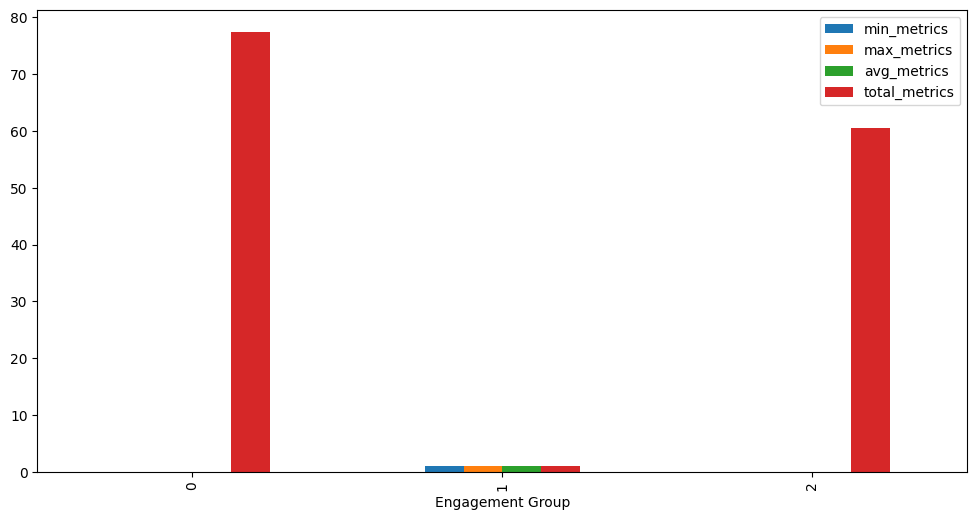

In [5]:
# Step 1: Group by 'Engagement Group' in normalized_data
metrics_summary = normalized_data.groupby('Engagement Group').agg(
    min_metrics=pd.NamedAgg(column='Social Media DL (Bytes)', aggfunc='min'),
    max_metrics=pd.NamedAgg(column='Social Media DL (Bytes)', aggfunc='max'),
    avg_metrics=pd.NamedAgg(column='Social Media DL (Bytes)', aggfunc='mean'),
    total_metrics=pd.NamedAgg(column='Social Media DL (Bytes)', aggfunc='sum'),
    # Repeat for other engagement metrics as necessary
).reset_index()

# Step 2: Visualize the results
metrics_summary.set_index('Engagement Group')[['min_metrics', 'max_metrics', 'avg_metrics', 'total_metrics']].plot(kind='bar', figsize=(12, 6))
plt.title('Engagement Metrics Summary by Cluster')
plt.xlabel('Engagement Group')
plt.ylabel('Bytes')
plt.legend(title='Metrics')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Print out the metrics summary
print(metrics_summary)



#### calculates the total data usage for various applications by summing both download (DL) and upload (UL) bytes for each customer. It then aggregates this usage across all customers to determine the total usage for each application, storing the results in a DataFrame. The top three applications with the highest total usage are identified and visualized using a bar chart. This visualization helps highlight which applications are most popular among users based on their data consumption, providing insights for potential marketing strategies or resource allocation.

C:\Users\sumey\AppData\Local\Temp\ipykernel_4172\1969461901.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_apps, x='Application', y='Total Usage', palette='viridis')


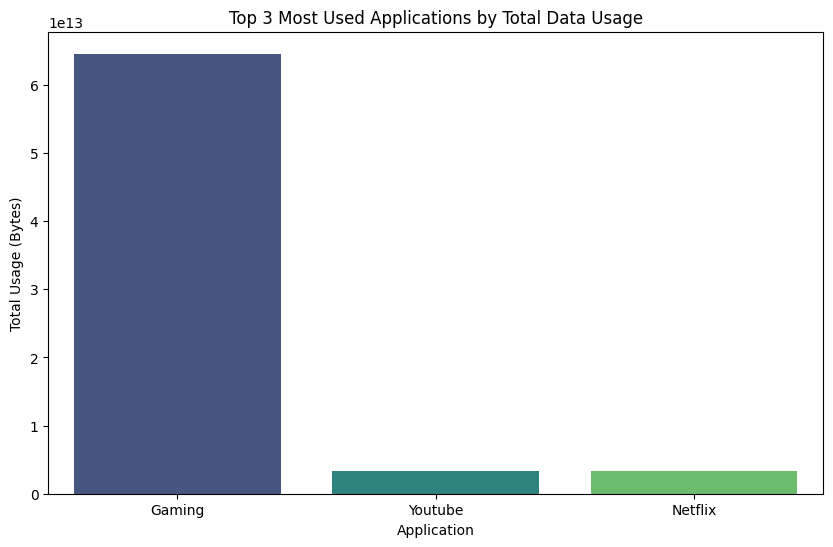

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming `aggregated_data` is the DataFrame created previously

# Step 1: Calculate total usage for each application (sum of DL and UL)
aggregated_data['Social Media Total'] = aggregated_data['Social Media DL (Bytes)'] + aggregated_data['Social Media UL (Bytes)']
aggregated_data['Netflix Total'] = aggregated_data['Netflix DL (Bytes)'] + aggregated_data['Netflix UL (Bytes)']
aggregated_data['Google Total'] = aggregated_data['Google DL (Bytes)'] + aggregated_data['Google UL (Bytes)']
aggregated_data['Email Total'] = aggregated_data['Email DL (Bytes)'] + aggregated_data['Email UL (Bytes)']
aggregated_data['Gaming Total'] = aggregated_data['Gaming DL (Bytes)'] + aggregated_data['Gaming UL (Bytes)']
aggregated_data['Youtube Total'] = aggregated_data['Youtube DL (Bytes)'] + aggregated_data['Youtube UL (Bytes)']

# Step 2: Sum total usage across all customers for each application
application_usage = {
    'Social Media': aggregated_data['Social Media Total'].sum(),
    'Netflix': aggregated_data['Netflix Total'].sum(),
    'Google': aggregated_data['Google Total'].sum(),
    'Email': aggregated_data['Email Total'].sum(),
    'Gaming': aggregated_data['Gaming Total'].sum(),
    'Youtube': aggregated_data['Youtube Total'].sum()
}

# Step 3: Convert to DataFrame and find the top 3 applications
usage_df = pd.DataFrame(list(application_usage.items()), columns=['Application', 'Total Usage'])
top_3_apps = usage_df.sort_values(by='Total Usage', ascending=False).head(3)

# Step 4: Plot using bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_apps, x='Application', y='Total Usage', palette='viridis')
plt.title('Top 3 Most Used Applications by Total Data Usage')
plt.xlabel('Application')
plt.ylabel('Total Usage (Bytes)')
plt.show()
